## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/07-2022 Instacart Basket Analysis'

In [3]:
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'instacart_final.pkl'))

## Bar Chart for Day of Week

In [20]:
# Create a bar chart

In [21]:
#Days
days = pd.DataFrame(data = {'days':['Sat','Sun','Mon','Tues','Wed','Thurs','Fri']})

Text(0.5, 1.0, 'Orders per Day of Week')

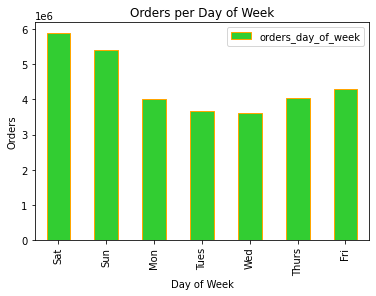

In [22]:
data = instacart['orders_day_of_week'].value_counts().sort_index().to_frame()
data = data.merge(days, how='inner',left_index=True,right_index=True).set_index('days')
bar = data.plot.bar(color = "limegreen",edgecolor = "orange")
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.title('Orders per Day of Week')

In [23]:
instacart.shape

(30964564, 32)

In [24]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_labeled.png'))

## Bar Chart Hour of Day

Text(0.5, 1.0, 'Orders per Hour of Day')

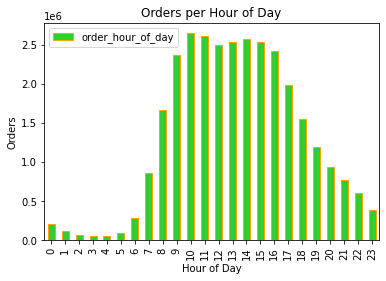

In [25]:
data = instacart['order_hour_of_day'].value_counts().sort_index().to_frame()
bar2 = data.plot.bar(color = "limegreen",edgecolor = "orange")
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.title('Orders per Hour of Day')

In [27]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_hod_labeled.png'))

## Create Smaller Dataset

In [28]:
#Create a smaller dataset with what is needed so to use less memory

In [29]:
np.random.seed(4)
dev = np.random.rand(len(instacart)) <= 0.7

In [30]:
big = instacart[dev]

In [31]:
small = instacart[~dev]

In [32]:
len(instacart)

30964564

In [33]:
len(big) + len(small)

30964564

In [34]:
#Create a smaller dataset with what is needed so to use less memory

In [36]:
df_1 = small[['order_hour_of_day','prices']]

## create Line Chart orders hour of day vs prices

Text(0.5, 1.0, 'Average Price of Item Bought by Hour')

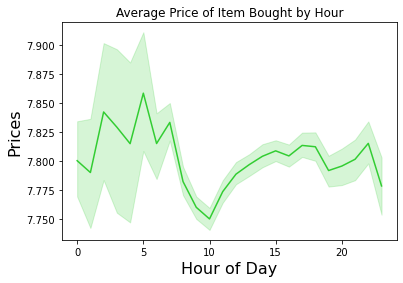

In [45]:
line1 = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices',color ='limegreen')
line1.set_xlabel('Hour of Day', fontsize = 16)
line1.set_ylabel('Prices', fontsize = 16)
line1.set_title('Average Price of Item Bought by Hour')

## Create line chart for day of week orders vs prices

In [43]:
df_2 = small[['orders_day_of_week','prices']]

Text(0.5, 1.0, 'Average Price of Item Bought by Day')

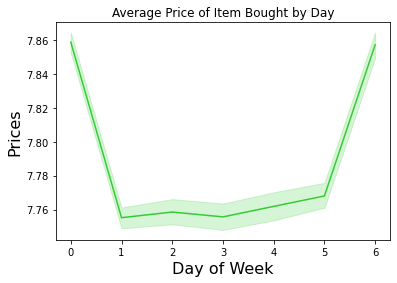

In [52]:
data = instacart['orders_day_of_week'].value_counts().sort_index().to_frame()
data = data.merge(days, how='inner',left_index=True,right_index=True).set_index('days')
line2 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices',color ='limegreen')
line2.set_xlabel("Day of Week", fontsize = 16)
line2.set_ylabel("Prices", fontsize = 16)
line2.set_title("Average Price of Item Bought by Day")

In [49]:
#Export Both Line Charts

In [54]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour_of_day.png'))

In [55]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_day_of_week.png'))

## Make histogram for prices per hour of day

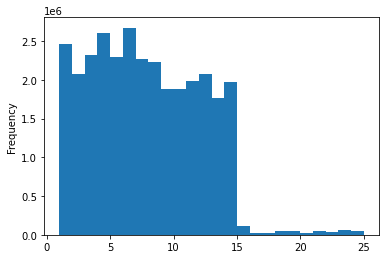

In [56]:
hist = instacart['prices'].plot.hist(bins = 24)

In [60]:
df_3 = small[['orders_day_of_week','mean_price']]

Text(0.5, 1.0, 'Average Price of Item Bought by Day')

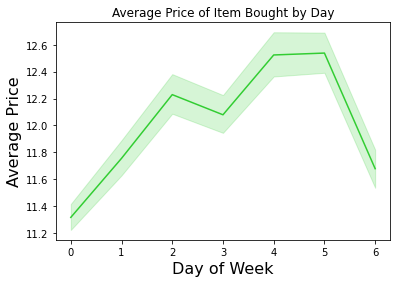

In [62]:
data = instacart['orders_day_of_week'].value_counts().sort_index().to_frame()
data = data.merge(days, how='inner',left_index=True,right_index=True).set_index('days')
line2 = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'mean_price',color ='limegreen')
line2.set_xlabel("Day of Week", fontsize = 16)
line2.set_ylabel("Average Price", fontsize = 16)
line2.set_title("Average Price of Item Bought by Day")

## Create Pie Chart for 3 categories of item prices